In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from result_saver import SaverProvider
provider = SaverProvider()

In [3]:
from soft_info import get_counts, get_KDEs

# Code params
d = 3
T = 3
layout = [25, 19, 26, 22, 16] # Hardcoded for testing purposes, can be retrieved


job = provider.retrieve_job("cmyhbrqrmwhg008bs4h0")
memory = job.result().get_memory()

kde_dict, scaler_dict = get_KDEs(provider, 'ibmq_mumbai', layout, bandwidths=0.2, plot=False)
counts_kde = get_counts(memory, kde_dict, scaler_dict, layout, T, True)

Processing 1000 shots: 100%|██████████| 1000/1000 [00:53<00:00, 18.85it/s]


In [5]:
counts_kde

{'000 00 00 00': 870,
 '000 01 00 00': 14,
 '000 10 10 10': 11,
 '000 01 01 01': 10,
 '000 00 01 00': 9,
 '100 00 10 00': 8,
 '100 10 00 10': 7,
 '000 10 00 00': 7,
 '000 10 10 00': 6,
 '010 11 00 11': 5,
 '001 00 00 00': 5,
 '001 01 00 01': 4,
 '001 01 00 00': 4,
 '001 00 01 00': 4,
 '100 10 00 00': 4,
 '100 00 00 00': 3,
 '000 00 10 00': 3,
 '000 10 00 10': 2,
 '000 00 10 10': 2,
 '000 01 01 00': 2,
 '010 11 01 00': 1,
 '010 00 00 00': 1,
 '010 11 00 00': 1,
 '010 01 00 11': 1,
 '001 01 01 01': 1,
 '010 01 10 01': 1,
 '010 10 01 00': 1,
 '001 10 10 00': 1,
 '000 00 00 01': 1,
 '010 00 11 00': 1,
 '000 10 11 10': 1,
 '000 11 01 01': 1,
 '100 00 10 10': 1,
 '001 01 10 00': 1,
 '001 01 01 00': 1,
 '000 00 00 10': 1,
 '000 01 00 01': 1,
 '010 10 00 00': 1,
 '001 11 10 10': 1,
 '100 10 10 00': 1}

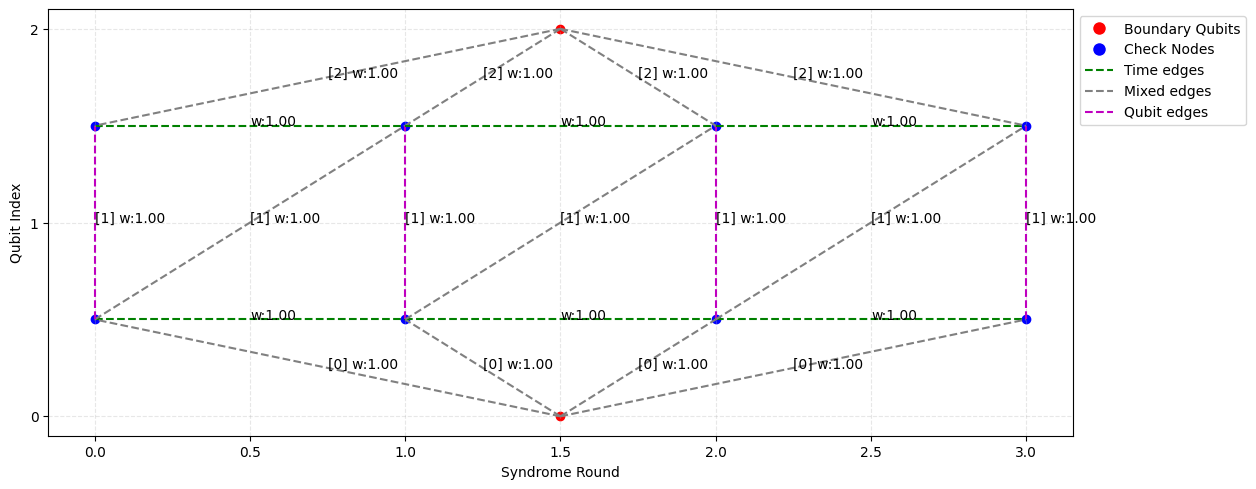

In [6]:
from qiskit_qec.circuits import RepetitionCodeCircuit, ArcCircuit
from qiskit_qec.decoders import UnionFindDecoder
from soft_info import rx_draw_2D

decoder = UnionFindDecoder(RepetitionCodeCircuit(d, T))
rx_draw_2D(decoder.graph)

# Decoding with soft reweighting Testing

In [5]:
from soft_info import soft_reweight, get_counts
from tqdm import tqdm

logical_counts = {'0':0, '1':0}
for shot in tqdm(range(len(memory))):
    IQ_data = memory[shot]

    counts = get_counts([IQ_data], kde_dict, scaler_dict, layout, T, verbose=False)
    count_key = next(iter(counts.keys()))
    if count_key == '000 00 00 00':
        continue

    reweighted_graph = soft_reweight(decoder, IQ_data, kde_dict, scaler_dict, layout)
    #decoder.graph = reweighted_graph   

    logical_counts[f"{decoder.process(count_key)[0]}"] += 1

print(logical_counts)



  0%|          | 0/1000 [00:00<?, ?it/s]

  1%|          | 9/1000 [00:00<01:07, 14.66it/s]

flipped qubits [1]
flipped qubits []


  2%|▏         | 23/1000 [00:01<01:09, 13.99it/s]

flipped qubits [1]
flipped qubits [1]


  5%|▌         | 51/1000 [00:03<01:06, 14.37it/s]

flipped qubits [1]
flipped qubits []


  6%|▌         | 62/1000 [00:03<00:59, 15.70it/s]

flipped qubits [2]


  8%|▊         | 76/1000 [00:04<00:55, 16.55it/s]

flipped qubits [1]


  8%|▊         | 80/1000 [00:05<01:09, 13.17it/s]

flipped qubits [1]
flipped qubits []
flipped qubits []
flipped qubits [0]


 10%|█         | 100/1000 [00:06<00:54, 16.38it/s]

flipped qubits [0]


 11%|█         | 109/1000 [00:06<00:55, 15.98it/s]

flipped qubits []
flipped qubits [0]
flipped qubits []


 13%|█▎        | 131/1000 [00:08<00:51, 16.86it/s]

flipped qubits []


 14%|█▍        | 140/1000 [00:08<01:03, 13.60it/s]

flipped qubits [2]
flipped qubits []


 16%|█▌        | 162/1000 [00:10<00:48, 17.32it/s]

flipped qubits [1]


 17%|█▋        | 168/1000 [00:10<00:52, 15.87it/s]

flipped qubits [0, 0]


 18%|█▊        | 180/1000 [00:11<00:52, 15.67it/s]

flipped qubits []
flipped qubits []


 19%|█▉        | 188/1000 [00:11<00:52, 15.47it/s]

flipped qubits [1]


 20%|██        | 201/1000 [00:12<00:53, 15.01it/s]

flipped qubits [0]
flipped qubits [0]
flipped qubits [0, 0]


 21%|██        | 207/1000 [00:12<00:57, 13.82it/s]

flipped qubits [0]


 22%|██▏       | 217/1000 [00:13<00:52, 14.99it/s]

flipped qubits [0]


 24%|██▍       | 242/1000 [00:15<00:50, 15.01it/s]

flipped qubits []


 26%|██▌       | 262/1000 [00:16<00:43, 17.07it/s]

flipped qubits [2]
flipped qubits [2]


 27%|██▋       | 266/1000 [00:16<00:49, 14.73it/s]

flipped qubits [2]


 28%|██▊       | 280/1000 [00:17<00:50, 14.23it/s]

flipped qubits [0, 0]
flipped qubits []


 30%|██▉       | 297/1000 [00:18<00:50, 13.97it/s]

flipped qubits []
flipped qubits [0]
flipped qubits []


 32%|███▏      | 316/1000 [00:19<00:42, 16.22it/s]

flipped qubits []


 33%|███▎      | 327/1000 [00:20<00:51, 12.98it/s]

flipped qubits [0]
flipped qubits [0, 0]


 34%|███▎      | 337/1000 [00:20<00:41, 16.12it/s]

flipped qubits []


 34%|███▍      | 343/1000 [00:21<00:48, 13.43it/s]

flipped qubits []
flipped qubits [0, 0]


 35%|███▍      | 349/1000 [00:21<00:58, 11.11it/s]

flipped qubits []
flipped qubits [0]


 35%|███▌      | 353/1000 [00:22<00:51, 12.60it/s]

flipped qubits [0, 0]


 39%|███▊      | 387/1000 [00:24<00:39, 15.67it/s]

flipped qubits [1]


 39%|███▉      | 391/1000 [00:24<00:41, 14.76it/s]

flipped qubits []
flipped qubits []


 40%|████      | 401/1000 [00:25<00:46, 12.99it/s]

flipped qubits []
flipped qubits []
flipped qubits [1, 2]
flipped qubits [0]


 41%|████      | 409/1000 [00:25<00:46, 12.85it/s]

flipped qubits [1]
flipped qubits []


 42%|████▏     | 415/1000 [00:26<00:43, 13.41it/s]

flipped qubits []
flipped qubits []
flipped qubits []


 42%|████▏     | 423/1000 [00:26<00:41, 14.07it/s]

flipped qubits [2]
flipped qubits [2, 2]


 43%|████▎     | 434/1000 [00:27<00:33, 16.85it/s]

flipped qubits []


 44%|████▍     | 443/1000 [00:27<00:35, 15.51it/s]

flipped qubits []


 45%|████▌     | 451/1000 [00:28<00:40, 13.57it/s]

flipped qubits [0, 0]
flipped qubits []
flipped qubits [2]


 46%|████▌     | 456/1000 [00:28<00:34, 15.74it/s]


flipped qubits []


KeyboardInterrupt: 

# Soft reweight testing

In [46]:
from soft_info import soft_reweight, rx_draw_2D

IQ_data_shot_0 = memory[0]
reweighted_graph = soft_reweight(decoder, IQ_data_shot_0, kde_dict, scaler_dict, layout)

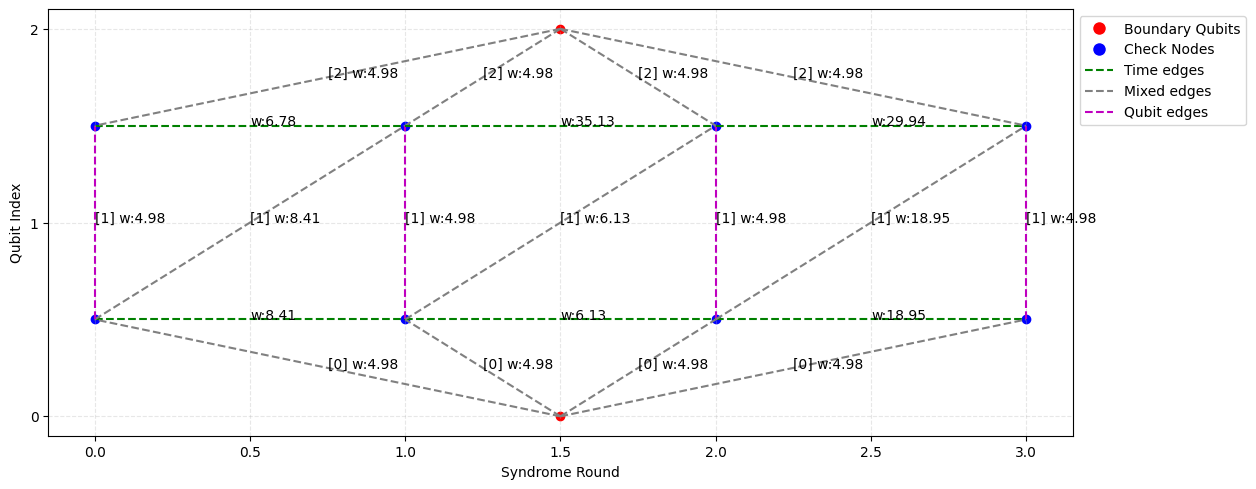

In [52]:
rx_draw_2D(reweighted_graph)

In [51]:
from tqdm import tqdm

for shot in tqdm(range(len(memory))):
    IQ_data_shot = memory[shot]
    reweighted_graph = soft_reweight(decoder, IQ_data_shot, kde_dict, scaler_dict, layout)

100%|██████████| 1000/1000 [01:15<00:00, 13.20it/s]


# Decoding graph testing

Nodes: <built-in method nodes of rustworkx.PyGraph object at 0x2a5a79040>


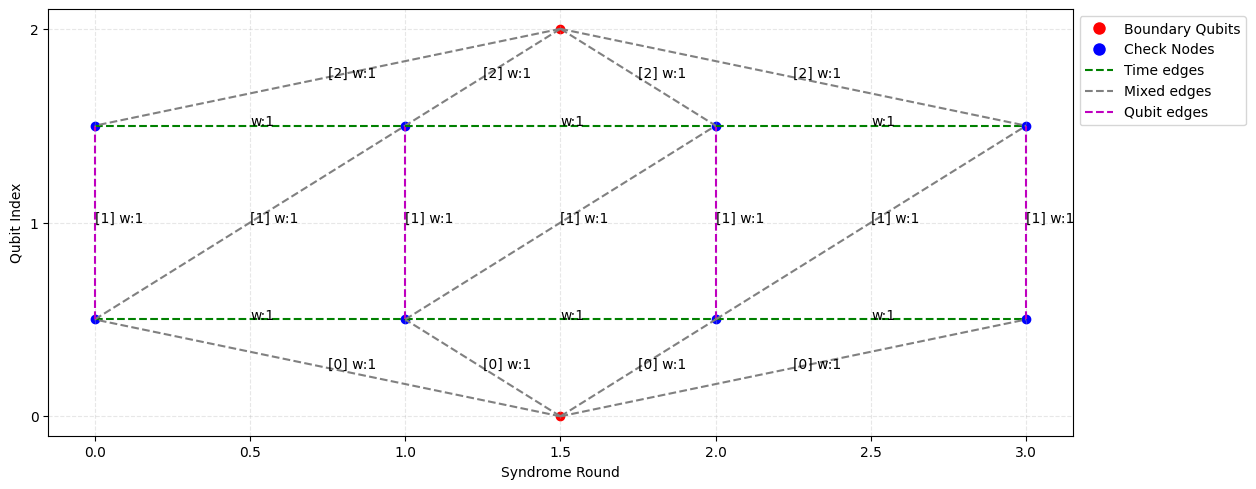

In [10]:
from soft_info import rx_draw_2D, soft_reweight

graph = decoder.decoding_graph.graph
rx_draw_2D(graph)

In [25]:
for idx, edge in enumerate(graph.edges()[:3]):
    print(f"Edge {idx}:", edge)
    print(edge.weight)
    print(edge.properties)

Edge 0: {'qubits': [], 'weight': 1, 'properties': {}}
1
{}
1
Edge 1: {'qubits': [0], 'weight': 1, 'properties': {}}
1
{}
1
Edge 2: {'qubits': [0], 'weight': 1, 'properties': {}}
1
{}
1


In [29]:
for idx, edge in enumerate(graph.edge_list()[:3]):
    print(f"Edge {idx}:", edge)

Edge 0: (0, 1)
Edge 1: (2, 1)
Edge 2: (2, 0)
